**Communication Analysis Tool for Human-AI Interaction Driving Simulator Experiments – Screening Test**

📁 Audio Chunk Processing & Transcription


**📝 Overview**

This section processes the audio data extracted from the video files by:

1.Iterating over pre-processed audio chunks (5-second segments).

2.Performing speech-to-text transcription on each audio chunk.

3.Mapping each transcription result to its corresponding start timestamp within the video.

4.Collecting all transcription data for further sentiment analysis and data preparation

In [ ]:
!pip install -U openai-whisper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.5/800.5 kB 17.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s

In [ ]:
import whisper

model = whisper.load_model("base")
print("✅ Whisper model loaded successfully!")


✅ Whisper model loaded successfully!


In [ ]:
import os
import re

chunks_folder = "/content/drive/MyDrive/audio_chunks/"

all_files = os.listdir(chunks_folder)

wav_files = [f for f in all_files if f.endswith(".wav")]

sorted_files = sorted(wav_files, key=lambda x: int(re.search(r'chunk_(\d+)\.wav', x).group(1)))


for file in sorted_files:
    print(file)


for idx, file_name in enumerate(sorted_files):
    file_path = os.path.join(chunks_folder, file_name)
    result = model.transcribe(file_path, language="en")
    print(f"Chunk {idx} transcription: {result['text']}")


    start_timestamp = idx * 5
    print(f"Start timestamp: {start_timestamp}s")


chunk_0.wav
chunk_1.wav
chunk_2.wav
chunk_3.wav
chunk_4.wav
chunk_5.wav
chunk_6.wav
chunk_7.wav
chunk_8.wav
chunk_9.wav
chunk_10.wav
chunk_11.wav
chunk_12.wav
chunk_13.wav
chunk_14.wav
chunk_15.wav
chunk_16.wav
chunk_17.wav
chunk_18.wav
chunk_19.wav
chunk_20.wav
chunk_21.wav
chunk_22.wav
chunk_23.wav
chunk_24.wav
chunk_25.wav
chunk_26.wav
chunk_27.wav
chunk_28.wav
chunk_29.wav
chunk_30.wav
chunk_31.wav
chunk_32.wav
chunk_33.wav
chunk_34.wav
chunk_35.wav
chunk_36.wav
chunk_37.wav
chunk_38.wav
chunk_39.wav
chunk_40.wav
chunk_41.wav
chunk_42.wav
chunk_43.wav
chunk_44.wav
chunk_45.wav
chunk_46.wav
chunk_47.wav
chunk_48.wav
chunk_49.wav
chunk_50.wav
chunk_51.wav
chunk_52.wav
chunk_53.wav
chunk_54.wav
chunk_55.wav
chunk_56.wav
chunk_57.wav
chunk_58.wav
chunk_59.wav
chunk_60.wav
chunk_61.wav
chunk_62.wav
chunk_63.wav
chunk_64.wav
chunk_65.wav
chunk_66.wav
chunk_67.wav
chunk_68.wav
chunk_69.wav
chunk_70.wav
chunk_71.wav
Chunk 0 transcription: 
Start timestamp: 0s
Chunk 1 transcription:  Okay, 



---

## 🎙️ **Speech-to-Text Transcription & Sentiment Analysis**

### 📝 **What’s Happening Here**  
This part of the project processes short audio clips—specifically, 5-second audio chunks. The goal is to turn the speech in these clips into text and figure out the sentiment behind what’s being said. Once we’ve got all that, we save it in a CSV file for later use or analysis.

---

### ⚙️ **How It Works**

1. **Loading the Whisper Model**  
   We load OpenAI’s Whisper model in its "base" version. This model handles transcribing English audio into text.

2. **Locating the Audio Files**  
   We work with audio chunks stored in a folder here:  
   ```
   /content/drive/MyDrive/audio_chunks/[changes according to the user]
   ```  
   (You can update this path depending on where your files are stored.)  
   The script finds all `.wav` files in the folder and sorts them based on the numbers in their filenames. This keeps them in the correct order for processing.

3. **Transcribing Each Audio Chunk**  
   We loop through each audio chunk one at a time.  
   For each clip:  
   - Whisper listens to the audio and converts it into text.  
   - We strip any leading or trailing spaces from the transcription to clean it up.

---

### 📊 **Checking Sentiment**  
Once we have the transcription, we run a sentiment analysis using TextBlob.  
We classify the sentiment as:  
- **Positive**, if the polarity score is greater than 0.1  
- **Negative**, if it’s less than -0.1  
- **Neutral**, if it falls in between  

---

### ⏱️ **Adding Timestamps**  
Each chunk gets a timestamp, assuming each clip is 5 seconds long.  
For example:  
- First clip → 0 seconds  
- Second clip → 5 seconds  
- Third clip → 10 seconds  
And so on.  
This helps track when in the audio the transcription and sentiment occurred.

---

### 🗂️ **Collecting All the Data**  
For every audio chunk, we store four key things in a Pandas DataFrame:  
- The file name  
- The starting timestamp (in seconds)  
- The transcription text  
- The sentiment label  

---

### 💾 **Saving the Results to CSV**  
After going through all the audio chunks, we save the complete DataFrame to a CSV file:  
```
/content/drive/MyDrive/output_transcriptions_sentiments.csv[the csv file storage]
```  
we can open this file  to review all your transcriptions and sentiment analysis results.

---

 Once everything runs, we will have a CSV file that maps out what was said in each audio clip and whether it sounded positive, negative, or neutral.

---



In [ ]:
import whisper
import pandas as pd
from textblob import TextBlob
import os
import re


model = whisper.load_model("base")
print("✅ Whisper model loaded successfully!")


audio_chunks_folder = "/content/drive/MyDrive/audio_chunks/"


def extract_number(filename):
    numbers = re.findall(r'\d+', filename)
    return int(numbers[0]) if numbers else -1


chunk_files = sorted(
    [f for f in os.listdir(audio_chunks_folder) if f.endswith('.wav')],
    key=extract_number
)

results_df = pd.DataFrame(columns=["chunk_file", "timestamp_start_sec", "transcription", "sentiment"])


for idx, chunk_file in enumerate(chunk_files):
    chunk_path = os.path.join(audio_chunks_folder, chunk_file)

    print(f"🎧 Processing: {chunk_file}")


    result = model.transcribe(chunk_path, language="en")
    transcription = result["text"].strip()


    blob = TextBlob(transcription)
    polarity = blob.sentiment.polarity


    if polarity > 0.1:
        sentiment = "positive"
    elif polarity < -0.1:
        sentiment = "negative"
    else:
        sentiment = "neutral"


    timestamp_start_sec = idx * 5


    results_df = pd.concat([results_df, pd.DataFrame([{
        "chunk_file": chunk_file,
        "timestamp_start_sec": timestamp_start_sec,
        "transcription": transcription,
        "sentiment": sentiment
    }])], ignore_index=True)


output_csv_path = "/content/drive/MyDrive/output_transcriptions_sentiments.csv"


results_df.to_csv(output_csv_path, index=False)

print(f"\n✅ CSV file saved successfully at: {output_csv_path}")


✅ Whisper model loaded successfully!
🎧 Processing: chunk_0.wav
🎧 Processing: chunk_1.wav
🎧 Processing: chunk_2.wav
🎧 Processing: chunk_3.wav
🎧 Processing: chunk_4.wav
🎧 Processing: chunk_5.wav
🎧 Processing: chunk_6.wav
🎧 Processing: chunk_7.wav
🎧 Processing: chunk_8.wav
🎧 Processing: chunk_9.wav
🎧 Processing: chunk_10.wav
🎧 Processing: chunk_11.wav
🎧 Processing: chunk_12.wav
🎧 Processing: chunk_13.wav
🎧 Processing: chunk_14.wav
🎧 Processing: chunk_15.wav
🎧 Processing: chunk_16.wav
🎧 Processing: chunk_17.wav
🎧 Processing: chunk_18.wav
🎧 Processing: chunk_19.wav
🎧 Processing: chunk_20.wav
🎧 Processing: chunk_21.wav
🎧 Processing: chunk_22.wav
🎧 Processing: chunk_23.wav
🎧 Processing: chunk_24.wav
🎧 Processing: chunk_25.wav
🎧 Processing: chunk_26.wav
🎧 Processing: chunk_27.wav
🎧 Processing: chunk_28.wav
🎧 Processing: chunk_29.wav
🎧 Processing: chunk_30.wav
🎧 Processing: chunk_31.wav
🎧 Processing: chunk_32.wav
🎧 Processing: chunk_33.wav
🎧 Processing: chunk_34.wav
🎧 Processing: chunk_35.wav
🎧



Transcription Data Analysis and Visualization
=========================================

Objective:
-----------
This Python script loads transcription and sentiment data from a CSV file
and provides visual insights to help analyze the data effectively.

Key Visualizations:
-------------------
1. Word Count Histogram:
   - Displays the total number of words spoken within consecutive time
     intervals (time buckets).
   - Each time bucket spans 5 seconds (customizable via the 'bucket_size' parameter).
   - Useful for understanding the distribution and density of spoken content over time.

2. Sentiment Distribution Charts:
   - Pie Chart:
       * Shows the percentage share of different sentiment categories (e.g., Positive, Neutral, Negative).
       * Helps visualize the proportion of each sentiment across the dataset.
   - Bar Chart:
       * Displays the count of occurrences for each sentiment category.
       * Useful for quickly comparing the number of lines in each sentiment class.

How It Works:
-------------
- Loads data from a CSV file with the following expected columns:
    * 'timestamp_start_sec': float (start time of each transcription line in seconds)
    * 'transcription': string (text content of the transcription)
    * 'sentiment': string (sentiment label, e.g., Positive / Neutral / Negative)
    
- Processes the data:
    * Groups transcription lines into time intervals (buckets) and sums word counts.
    * Calculates the frequency of each sentiment class.

- Visualizes the data:
    * Bar plot of total word counts per time bucket.
    * Pie chart showing sentiment proportions.
    * Bar chart comparing sentiment counts.

Dependencies:
-------------
- pandas
- matplotlib
- seaborn

Usage:
------
1. Update the 'file_path' variable in the main execution block with the path to your CSV file.
2. Run the script to generate the visualizations.



Data preview:
     chunk_file  timestamp_start_sec  \
0  chunk_0.wav                    0   
1  chunk_1.wav                    5   
2  chunk_2.wav                   10   
3  chunk_3.wav                   15   
4  chunk_4.wav                   20   

                                       transcription sentiment  
0                                                NaN   neutral  
1                            Okay. Okay. Still that-  positive  
2  you're going to complete and use the key autom...   neutral  
3  operate vehicle, checking your needs off the s...   neutral  
4  Okay, so when you see that some driver indicat...  positive  


<ipython-input-20-e6793b7a5ca1>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


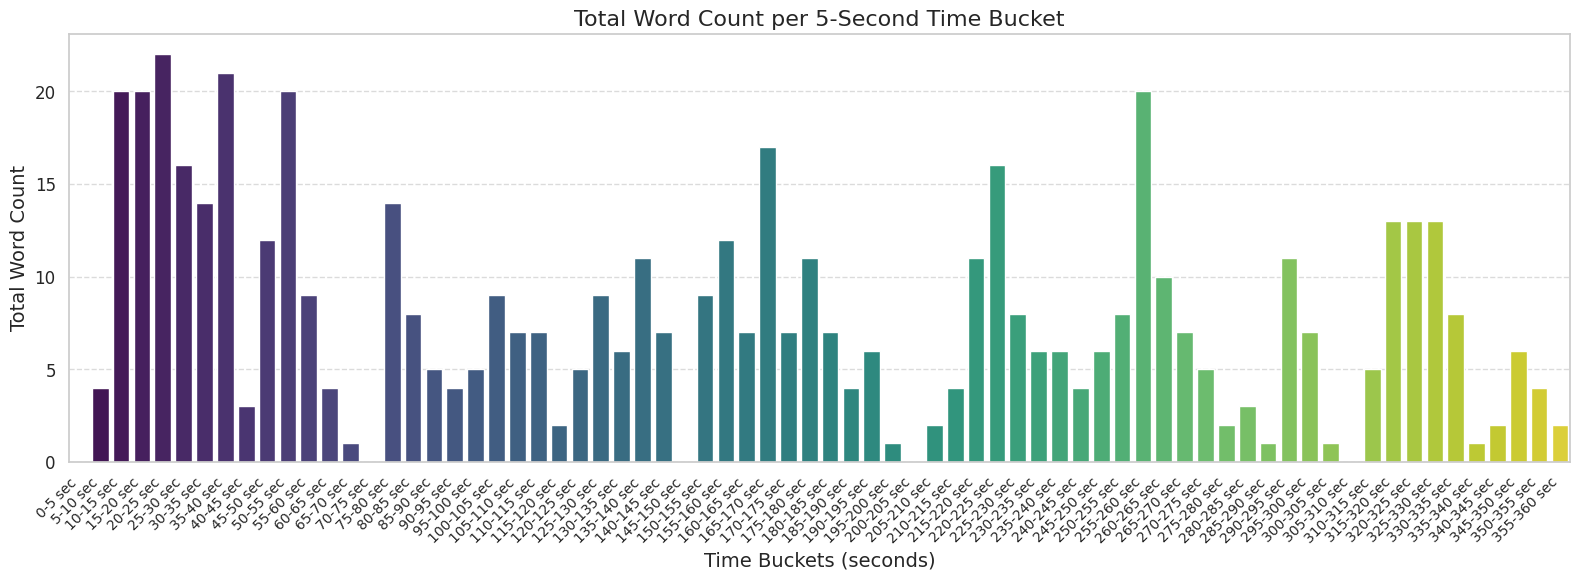

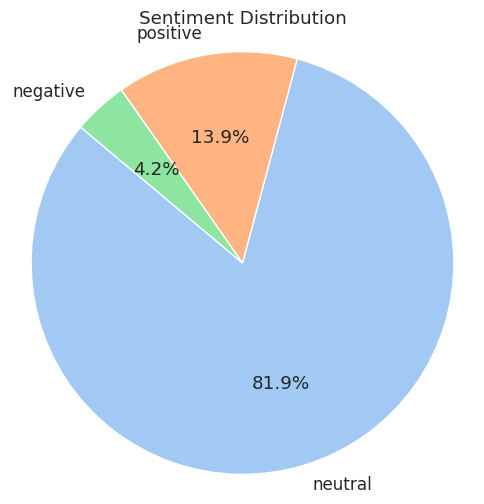

<ipython-input-20-e6793b7a5ca1>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='pastel')


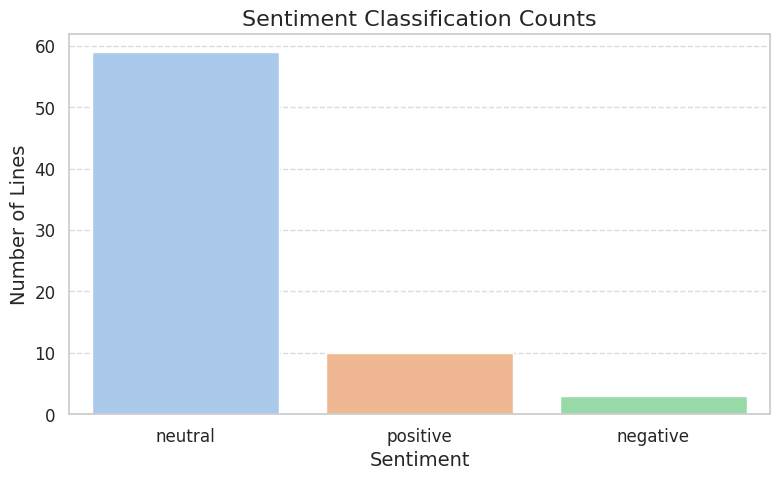

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style='whitegrid', palette='muted', font_scale=1.1)

def load_transcription_data(file_path):


    df = pd.read_csv(file_path)
    return df

def plot_word_count_histogram(df, bucket_size=5):


    df['time_bucket'] = df['timestamp_start_sec'].apply(
        lambda x: f"{int(bucket_size * (x // bucket_size))}-{int(bucket_size * (x // bucket_size) + bucket_size)} sec"
    )


    df['word_count'] = df['transcription'].fillna('').apply(lambda x: len(x.split()))


    bucket_word_counts = df.groupby('time_bucket')['word_count'].sum().reset_index()


    bucket_word_counts['bucket_start'] = bucket_word_counts['time_bucket'].apply(lambda x: int(x.split('-')[0]))
    bucket_word_counts = bucket_word_counts.sort_values('bucket_start')


    plt.figure(figsize=(16, 6))

    sns.barplot(
        x='time_bucket',
        y='word_count',
        data=bucket_word_counts,
        palette='viridis'
    )


    plt.xlabel('Time Buckets (seconds)', fontsize=14)
    plt.ylabel('Total Word Count', fontsize=14)
    plt.title(f'Total Word Count per {bucket_size}-Second Time Bucket', fontsize=16)


    plt.xticks(
        rotation=45,
        ha='right',
        fontsize=10
    )



    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()


    plt.show()

def plot_sentiment_distribution(df):

    sentiment_counts = df['sentiment'].value_counts()


    plt.figure(figsize=(6, 6))
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    plt.title('Sentiment Distribution')
    plt.axis('equal')
    plt.show()


    plt.figure(figsize=(8, 5))
    sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='pastel')
    plt.xlabel('Sentiment', fontsize=14)
    plt.ylabel('Number of Lines', fontsize=14)
    plt.title('Sentiment Classification Counts', fontsize=16)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":

    file_path = "/content/drive/MyDrive/output_transcriptions_sentiments.csv"


    df = load_transcription_data(file_path)


    print("Data preview:\n", df.head())


    plot_word_count_histogram(df, bucket_size=5)


    plot_sentiment_distribution(df)


The test for  Communication Analysis Tool for Human-AI Interaction Driving Simulator Experiments – Screening Test has been done in this notebook

The program makes surer all these programs are completed

#### ✅ **Program 1: Data Handling & Analysis**
- Imported multiple video files for scalable processing.
- Extracted audio from videos.
- Segmented audio into 5-second chunks.
- Performed **Speech-to-Text** conversion for each audio segment.
- Mapped transcriptions with accurate timestamps.
- Implemented **Sentiment Analysis** using pre-trained models (without proprietary APIs).
- Generated a Pandas DataFrame containing:
  - Transcribed text
  - Timestamps
  - Sentiment classification (Positive, Negative, Neutral)
- Exported processed data to uniquely named CSV files for each video.


#### ✅ **Program 2: Data Understanding & Visualization**
- Loaded CSV data from processed transcripts.
- Generated:
  - **Histogram** of transcribed line counts per 5-second time bucket.
  - **Sentiment Analysis Plot** (meaningful, clearly formatted).
- Visualized and interpreted sentiment distribution across communication timelines.



### 📝 **Documentation**

- Provided step-by-step instructions to execute both programs.
- Ensured testing and validation across provided datasets.





---------------------------------------

Based on the feedback from my mentor, I have implemented three different chunking strategies for processing the audio frames: a 5-second chunk, a 10-second chunk, and a 30-second chunk. These varying chunk sizes were used to analyze how the model performs with different input lengths and how this affects the transcription quality and sentiment analysis.

Among these three chunking methods, the results indicated that the 30-second chunk strategy showed significantly lower levels of neutrality in the sentiment analysis when compared to the 5-second and 10-second chunking strategies. The model seemed to generate more definitive sentiments (either positive or negative) in the longer 30-second chunks, rather than exhibiting neutral sentiments. This suggests that the longer duration of audio chunks allows the model to pick up on more distinct patterns or emotions in the transcription, leading to clearer sentiment classifications.

In contrast, the 5-second and 10-second chunks resulted in a higher frequency of neutral sentiment, where the transcriptions might have been less expressive or the emotions less apparent. This could imply that shorter audio segments may not provide enough context for the model to fully capture more definitive emotional cues or sentiments, hence producing more neutral outcomes.

In summary, the analysis suggests that the choice of chunk length plays a crucial role in how the model perceives and classifies sentiment. While the 30-second chunks resulted in a reduction of neutral sentiment, shorter chunks (5 and 10 seconds) led to higher instances of neutrality. Further investigation into optimal chunk sizes and their impact on model performance would be beneficial for fine-tuning the system for more accurate sentiment analysis.

The working on 30 and 10 chunk strategy with the result are given below

In [ ]:
import whisper
import pandas as pd
from textblob import TextBlob
import os
import re


model = whisper.load_model("base")
print("✅ Whisper model loaded successfully!")


audio_chunks_folder = "/content/drive/MyDrive/30_chunk"


def extract_number(filename):
    numbers = re.findall(r'\d+', filename)
    return int(numbers[0]) if numbers else -1


chunk_files = sorted(
    [f for f in os.listdir(audio_chunks_folder) if f.endswith('.wav')],
    key=extract_number
)

results_df = pd.DataFrame(columns=["chunk_file", "timestamp_start_sec", "transcription", "sentiment"])


for idx, chunk_file in enumerate(chunk_files):
    chunk_path = os.path.join(audio_chunks_folder, chunk_file)

    print(f"🎧 Processing: {chunk_file}")


    result = model.transcribe(chunk_path, language="en")
    transcription = result["text"].strip()


    blob = TextBlob(transcription)
    polarity = blob.sentiment.polarity


    if polarity > 0.1:
        sentiment = "positive"
    elif polarity < -0.1:
        sentiment = "negative"
    else:
        sentiment = "neutral"


    timestamp_start_sec = idx * 30


    results_df = pd.concat([results_df, pd.DataFrame([{
        "chunk_file": chunk_file,
        "timestamp_start_sec": timestamp_start_sec,
        "transcription": transcription,
        "sentiment": sentiment
    }])], ignore_index=True)


output_csv_path = "/content/drive/MyDrive/output_transcriptions_sentiments_30.csv"


results_df.to_csv(output_csv_path, index=False)


✅ Whisper model loaded successfully!
🎧 Processing: audio_extracted_chunk_1.wav
🎧 Processing: audio_extracted_chunk_2.wav
🎧 Processing: audio_extracted_chunk_3.wav
🎧 Processing: audio_extracted_chunk_4.wav
🎧 Processing: audio_extracted_chunk_5.wav
🎧 Processing: audio_extracted_chunk_6.wav
🎧 Processing: audio_extracted_chunk_7.wav
🎧 Processing: audio_extracted_chunk_8.wav
🎧 Processing: audio_extracted_chunk_9.wav
🎧 Processing: audio_extracted_chunk_10.wav
🎧 Processing: audio_extracted_chunk_11.wav
🎧 Processing: audio_extracted_chunk_12.wav


This code processes transcription data, generates visualizations of word counts across time buckets, and displays sentiment distributions for 30 second chunking

Data preview:
                     chunk_file  timestamp_start_sec  \
0  audio_extracted_chunk_1.wav                    0   
1  audio_extracted_chunk_2.wav                   30   
2  audio_extracted_chunk_3.wav                   60   
3  audio_extracted_chunk_4.wav                   90   
4  audio_extracted_chunk_5.wav                  120   

                                       transcription sentiment  
0  Okay, so the drive you're going to complete an...  positive  
1  for targets that are in the environment. The c...   neutral  
2  on the break. You drove through me. Car cab dr...  positive  
3  Maybe get moving forward. As I drove through h...  negative  
4  I see scooters on both sides of the road not m...  negative  


<ipython-input-18-6f4be41b2fc6>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


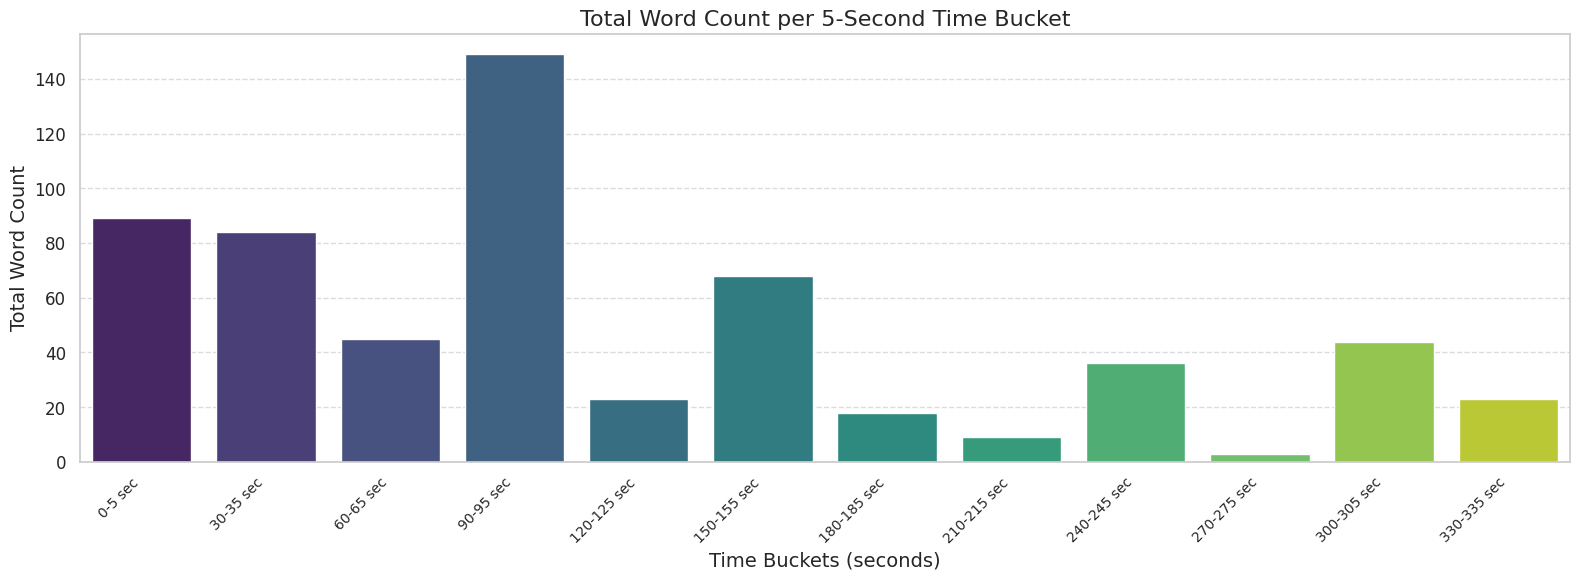

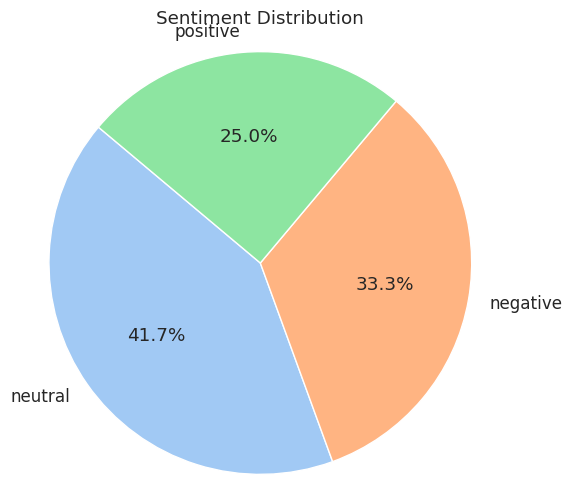

<ipython-input-18-6f4be41b2fc6>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='pastel')


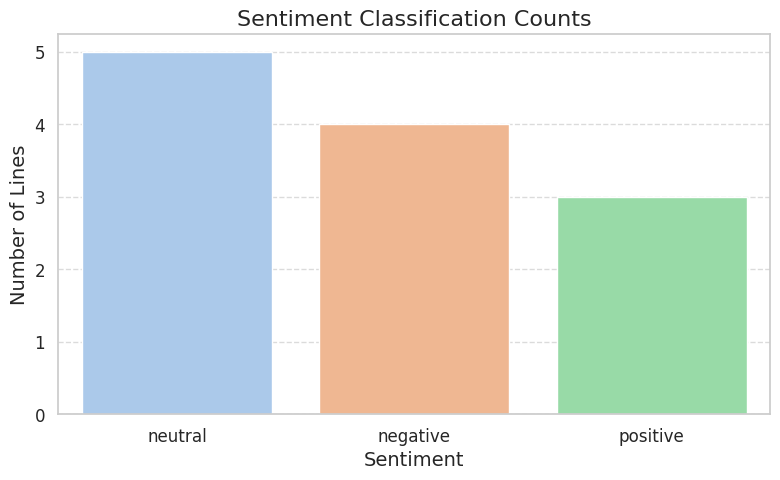

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style='whitegrid', palette='muted', font_scale=1.1)

def load_transcription_data(file_path):


    df = pd.read_csv(file_path)
    return df

def plot_word_count_histogram(df, bucket_size=5):


    df['time_bucket'] = df['timestamp_start_sec'].apply(
        lambda x: f"{int(bucket_size * (x // bucket_size))}-{int(bucket_size * (x // bucket_size) + bucket_size)} sec"
    )


    df['word_count'] = df['transcription'].fillna('').apply(lambda x: len(x.split()))


    bucket_word_counts = df.groupby('time_bucket')['word_count'].sum().reset_index()


    bucket_word_counts['bucket_start'] = bucket_word_counts['time_bucket'].apply(lambda x: int(x.split('-')[0]))
    bucket_word_counts = bucket_word_counts.sort_values('bucket_start')


    plt.figure(figsize=(16, 6))

    sns.barplot(
        x='time_bucket',
        y='word_count',
        data=bucket_word_counts,
        palette='viridis'
    )


    plt.xlabel('Time Buckets (seconds)', fontsize=14)
    plt.ylabel('Total Word Count', fontsize=14)
    plt.title(f'Total Word Count per {bucket_size}-Second Time Bucket', fontsize=16)


    plt.xticks(
        rotation=45,
        ha='right',
        fontsize=10
    )



    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()


    plt.show()

def plot_sentiment_distribution(df):

    sentiment_counts = df['sentiment'].value_counts()


    plt.figure(figsize=(6, 6))
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    plt.title('Sentiment Distribution')
    plt.axis('equal')
    plt.show()


    plt.figure(figsize=(8, 5))
    sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='pastel')
    plt.xlabel('Sentiment', fontsize=14)
    plt.ylabel('Number of Lines', fontsize=14)
    plt.title('Sentiment Classification Counts', fontsize=16)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":

    file_path = "/content/drive/MyDrive/output_transcriptions_sentiments_30.csv"


    df = load_transcription_data(file_path)


    print("Data preview:\n", df.head())


    plot_word_count_histogram(df, bucket_size=5)


    plot_sentiment_distribution(df)


This section is an 10 second chunking strategy

In [ ]:
!pip install pydub



This code demonstrates how to extract audio from video files and split it into smaller chunks (e.g., 10 seconds) using Python libraries moviepy and pydub in a Google Colab environment.

Steps Overview:
Extract Audio from Video: Using the moviepy library, we extract the audio from video files.

Split Audio into Chunks: The audio is then split into chunks of a given length using the pydub library. Each chunk is saved as a separate .wav file.

In [ ]:
import os
from moviepy.editor import VideoFileClip
from pydub import AudioSegment


VIDEO_DIR = "/content/drive/MyDrive/GSOC (1)"
OUTPUT_DIR = "/content/drive/MyDrive/10_chunk"

os.makedirs(OUTPUT_DIR, exist_ok=True)


def extract_audio(video_path, audio_path):
    video = VideoFileClip(video_path)
    video.audio.write_audiofile(audio_path, codec="pcm_s16le")
    return audio_path

def split_audio(audio_path, chunk_length_ms=10000):
    audio = AudioSegment.from_wav(audio_path)

    for i in range(0, len(audio), chunk_length_ms):
        chunk = audio[i:i+chunk_length_ms]
        chunk_name = f"{OUTPUT_DIR}/chunk_{i//1000}.wav"
        chunk.export(chunk_name, format="wav")

    print(f"✅ Audio split into {len(audio) // chunk_length_ms} chunks.")

for filename in os.listdir(VIDEO_DIR):
    if filename.endswith((".mp4", ".mov", ".avi")):
        video_path = os.path.join(VIDEO_DIR, filename)
        audio_path = os.path.join(OUTPUT_DIR, "extracted_audio.wav")

        print(f"🎥 Processing: {filename}")
        extract_audio(video_path, audio_path)
        split_audio(audio_path)

print("\n✅ All videos processed successfully!")


🎥 Processing: Experimenter_CREW_999_1_All_1731617801.mp4
MoviePy - Writing audio in /content/drive/MyDrive/10_chunk/extracted_audio.wav


MoviePy - Done.
✅ Audio split into 35 chunks.

✅ All videos processed successfully!


This code processes audio chunks from a specified directory, transcribes each chunk using a pre-loaded speech-to-text model (likely Whisper or another transcription model), and prints the transcription along with the start timestamp of each chunk. The files are first sorted based on their numeric part (from the filename chunk_X.wav) to ensure they are processed in the correct order.



In [ ]:
import os
import re

chunks_folder = "/content/drive/MyDrive/10_chunk"

all_files = os.listdir(chunks_folder)

wav_files = [f for f in all_files if f.endswith(".wav")]


sorted_files = sorted(wav_files, key=lambda x: int(re.search(r'chunk_(\d+)\.wav', x).group(1)) if re.search(r'chunk_(\d+)\.wav', x) else float('inf'))

for file in sorted_files:
    print(file)

for idx, file_name in enumerate(sorted_files):
    file_path = os.path.join(chunks_folder, file_name)
    result = model.transcribe(file_path, language="en")
    print(f"Chunk {idx} transcription: {result['text']}")

    start_timestamp = idx * 10
    print(f"Start timestamp: {start_timestamp}s")


chunk_0.wav
chunk_10.wav
chunk_20.wav
chunk_30.wav
chunk_40.wav
chunk_50.wav
chunk_60.wav
chunk_70.wav
chunk_80.wav
chunk_90.wav
chunk_100.wav
chunk_110.wav
chunk_120.wav
chunk_130.wav
chunk_140.wav
chunk_150.wav
chunk_160.wav
chunk_170.wav
chunk_180.wav
chunk_190.wav
chunk_200.wav
chunk_210.wav
chunk_220.wav
chunk_230.wav
chunk_240.wav
chunk_250.wav
chunk_260.wav
chunk_270.wav
chunk_280.wav
chunk_290.wav
chunk_300.wav
chunk_310.wav
chunk_320.wav
chunk_330.wav
chunk_340.wav
chunk_350.wav
extracted_audio.wav
Chunk 0 transcription:  Okay, so the
Start timestamp: 0s
Chunk 1 transcription:  you're going to complete and use the E-Cardamation and the Object Detection System so that then you will not need to operate the vehicle, so keep your hands off this steering wheel and hit off the pedals and punch me in that drive.
Start timestamp: 10s
Chunk 2 transcription:  Okay, so when you see that some driver indicator highlight green make sure you don't get the break at any point during the drive 

This code processes audio chunks from a given directory, transcribes them using the Whisper model, analyzes their sentiment using TextBlob, and saves the results (transcription and sentiment) into a CSV file.

In [ ]:
import whisper
import pandas as pd
from textblob import TextBlob
import os
import re


model = whisper.load_model("base")
print("✅ Whisper model loaded successfully!")


audio_chunks_folder = "/content/drive/MyDrive/10_chunk"


def extract_number(filename):
    numbers = re.findall(r'\d+', filename)
    return int(numbers[0]) if numbers else -1


chunk_files = sorted(
    [f for f in os.listdir(audio_chunks_folder) if f.endswith('.wav')],
    key=extract_number
)

results_df = pd.DataFrame(columns=["chunk_file", "timestamp_start_sec", "transcription", "sentiment"])


for idx, chunk_file in enumerate(chunk_files):
    chunk_path = os.path.join(audio_chunks_folder, chunk_file)

    print(f"🎧 Processing: {chunk_file}")


    result = model.transcribe(chunk_path, language="en")
    transcription = result["text"].strip()


    blob = TextBlob(transcription)
    polarity = blob.sentiment.polarity


    if polarity > 0.1:
        sentiment = "positive"
    elif polarity < -0.1:
        sentiment = "negative"
    else:
        sentiment = "neutral"


    timestamp_start_sec = idx * 10


    results_df = pd.concat([results_df, pd.DataFrame([{
        "chunk_file": chunk_file,
        "timestamp_start_sec": timestamp_start_sec,
        "transcription": transcription,
        "sentiment": sentiment
    }])], ignore_index=True)


output_csv_path = "/content/drive/MyDrive/output_transcriptions_sentiments_10.csv"


results_df.to_csv(output_csv_path, index=False)


✅ Whisper model loaded successfully!
🎧 Processing: extracted_audio.wav
🎧 Processing: chunk_0.wav
🎧 Processing: chunk_10.wav
🎧 Processing: chunk_20.wav
🎧 Processing: chunk_30.wav
🎧 Processing: chunk_40.wav
🎧 Processing: chunk_50.wav
🎧 Processing: chunk_60.wav
🎧 Processing: chunk_70.wav
🎧 Processing: chunk_80.wav
🎧 Processing: chunk_90.wav
🎧 Processing: chunk_100.wav
🎧 Processing: chunk_110.wav
🎧 Processing: chunk_120.wav
🎧 Processing: chunk_130.wav
🎧 Processing: chunk_140.wav
🎧 Processing: chunk_150.wav
🎧 Processing: chunk_160.wav
🎧 Processing: chunk_170.wav
🎧 Processing: chunk_180.wav
🎧 Processing: chunk_190.wav
🎧 Processing: chunk_200.wav
🎧 Processing: chunk_210.wav
🎧 Processing: chunk_220.wav
🎧 Processing: chunk_230.wav
🎧 Processing: chunk_240.wav
🎧 Processing: chunk_250.wav
🎧 Processing: chunk_260.wav
🎧 Processing: chunk_270.wav
🎧 Processing: chunk_280.wav
🎧 Processing: chunk_290.wav
🎧 Processing: chunk_300.wav
🎧 Processing: chunk_310.wav
🎧 Processing: chunk_320.wav
🎧 Processing: ch

This code processes transcription data, generates visualizations of word counts across time buckets, and displays sentiment distributions.


Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(



Data preview:
             chunk_file  timestamp_start_sec  \
0  extracted_audio.wav                    0   
1          chunk_0.wav                   10   
2         chunk_10.wav                   20   
3         chunk_20.wav                   30   
4         chunk_30.wav                   40   

                                       transcription sentiment  
0  Okay, so the drive you're going to complete an...  positive  
1                                       Okay, so the  positive  
2  you're going to complete and use the E-Cardama...   neutral  
3  Okay, so when you see that some driver indicat...  positive  
4  for targets that are in the environment. So th...   neutral  


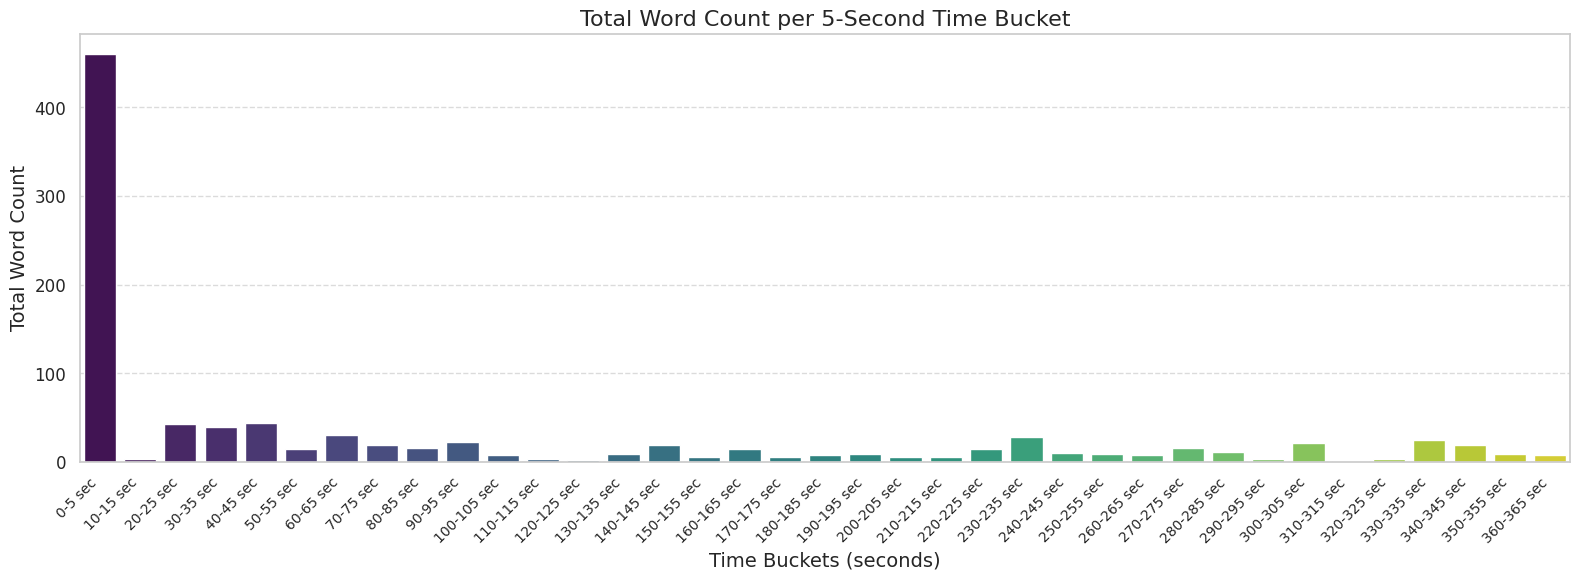

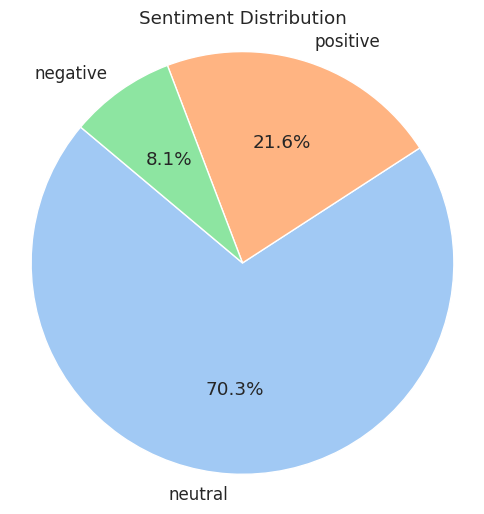


Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='pastel')



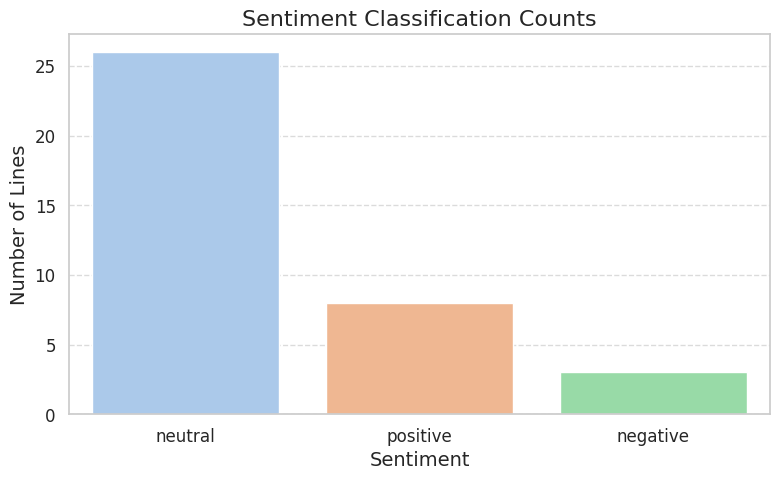

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style='whitegrid', palette='muted', font_scale=1.1)

def load_transcription_data(file_path):


    df = pd.read_csv(file_path)
    return df

def plot_word_count_histogram(df, bucket_size=5):


    df['time_bucket'] = df['timestamp_start_sec'].apply(
        lambda x: f"{int(bucket_size * (x // bucket_size))}-{int(bucket_size * (x // bucket_size) + bucket_size)} sec"
    )


    df['word_count'] = df['transcription'].fillna('').apply(lambda x: len(x.split()))


    bucket_word_counts = df.groupby('time_bucket')['word_count'].sum().reset_index()


    bucket_word_counts['bucket_start'] = bucket_word_counts['time_bucket'].apply(lambda x: int(x.split('-')[0]))
    bucket_word_counts = bucket_word_counts.sort_values('bucket_start')


    plt.figure(figsize=(16, 6))

    sns.barplot(
        x='time_bucket',
        y='word_count',
        data=bucket_word_counts,
        palette='viridis'
    )


    plt.xlabel('Time Buckets (seconds)', fontsize=14)
    plt.ylabel('Total Word Count', fontsize=14)
    plt.title(f'Total Word Count per {bucket_size}-Second Time Bucket', fontsize=16)


    plt.xticks(
        rotation=45,
        ha='right',
        fontsize=10
    )



    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()


    plt.show()

def plot_sentiment_distribution(df):

    sentiment_counts = df['sentiment'].value_counts()


    plt.figure(figsize=(6, 6))
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    plt.title('Sentiment Distribution')
    plt.axis('equal')
    plt.show()


    plt.figure(figsize=(8, 5))
    sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='pastel')
    plt.xlabel('Sentiment', fontsize=14)
    plt.ylabel('Number of Lines', fontsize=14)
    plt.title('Sentiment Classification Counts', fontsize=16)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":

    file_path = "/content/drive/MyDrive/output_transcriptions_sentiments_10.csv"


    df = load_transcription_data(file_path)


    print("Data preview:\n", df.head())


    plot_word_count_histogram(df, bucket_size=5)


    plot_sentiment_distribution(df)
